In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from scipy.cluster.hierarchy import dendrogram,fcluster
from collections import Counter
import matplotlib as mpl

In [2]:
#reading data from csv file

df=pd.read_csv('crop data.csv')

In [3]:
df.head()
df.shape

(246091, 8)

In [4]:
#checking for Null values

df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
Literacy Rate       0
dtype: int64

In [5]:
#since there are 3730 null values under production attribute and 3730 <<< 246091
#let's remove all those null values

df.dropna(inplace=True)
df.shape

(242361, 8)

In [6]:
df.head(70)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Literacy Rate
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00,81.3
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00,81.3
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,81.3
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00,81.3
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00,81.3
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.00,81.3
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.00,100.00,81.3
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.00,2.00,81.3
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.00,15.00,81.3
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.00,169.00,81.3


In [7]:
#index values are not continuous , resetting the index
df.reset_index(drop=True,inplace=True)

In [8]:
df.head(70)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Literacy Rate
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00,81.3
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00,81.3
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,81.3
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00,81.3
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00,81.3
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.00,81.3
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.00,100.00,81.3
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.00,2.00,81.3
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.00,15.00,81.3
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.00,169.00,81.3


In [9]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [10]:
#Kharif and autumn are same
#Rabi and winter are same
#whole year can be divided into three seasons-Kharif , rabi and summer
df['Season'].replace(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '],['Kharif','Whole Year','Kharif','Rabi','Summer','Rabi'],inplace=True)

In [11]:
for i in range(0,15411):
    if df.loc[i,'Season'] == 'Whole Year':
        df.loc[i,'Production']=(df.loc[i,'Production']/3).round(2)

In [12]:
df['Season'].replace('Whole Year','Kharif,Rabi,Summer',inplace=True)

In [13]:
df.head(20)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Literacy Rate
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00,81.3
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00,81.3
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,81.3
3,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Banana,176.0,213.67,81.3
4,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Cashewnut,720.0,55.00,81.3
5,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Coconut,18168.0,21700000.00,81.3
6,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Dry ginger,36.0,33.33,81.3
7,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Sugarcane,1.0,0.67,81.3
8,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Sweet potato,5.0,5.00,81.3
9,Andaman and Nicobar Islands,NICOBARS,2000,"Kharif,Rabi,Summer",Tapioca,40.0,56.33,81.3


In [14]:
df['Season']=df['Season'].str.split(',')

In [15]:
df=(df.set_index(['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area','Production', 'Literacy Rate'])['Season']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop(index=3, axis=1)
 .rename(columns={0:'Season'}))

In [16]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area',
       'Production', 'Literacy Rate', 'level_7', 'Season'],
      dtype='object')

In [17]:
df.drop('level_7',axis=1,inplace=True)

In [18]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area',
       'Production', 'Literacy Rate', 'Season'],
      dtype='object')

In [19]:
# The district column doesn't help us much . Hence eliminating it

df['summ']=1 #to get a count of how many rows are merged

In [20]:
#df.drop('District_Name')
df.drop('District_Name',axis=1,inplace=True)

In [21]:
df.columns=['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production',
       'Literacy_Rate', 'Season','summ']

In [22]:
df1=df.groupby(['State_Name', 'Crop_Year', 'Season', 'Crop']).Area.sum()
df2=df.groupby(['State_Name', 'Crop_Year', 'Season', 'Crop']).Production.sum()
df3=df.groupby(['State_Name', 'Crop_Year', 'Season', 'Crop']).Literacy_Rate.sum()
df4=df.groupby(['State_Name', 'Crop_Year', 'Season', 'Crop']).summ.sum()

In [23]:
df=pd.concat([df1,df2,df3,df4],axis=1)

In [24]:
df.head(100)

Area  \
State_Name                  Crop_Year Season Crop                            
Andaman and Nicobar Islands 2000      Kharif Arecanut              4354.00   
                                             Banana                1531.00   
                                             Cashewnut              800.00   
                                             Coconut              25160.00   
                                             Dry ginger             388.00   
                                             Other Kharif pulses    670.00   
                                             Rice                 10881.00   
                                             Sugarcane              142.00   
                                             Sweet potato            83.00   
                                             Tapioca                200.00   
                                             other oilseeds         133.00   
                                      Rabi   Banana                1707.00   
                                             Cashewnut              800.00   
                                             Coconut              25160.00   
                                             Dry ginger             388.00   
                                             Sugarcane              142.00   
                                             Sweet potato            83.00   
                                             Tapioca                200.00   
                                             other oilseeds         133.00   
                                      Summer Banana                1707.00   
                                             Cashewnut              800.00   
                                             Coconut              25160.00   
                                             Dry ginger             388.00   
                                             Sugarcane              142.00   
                                             Sweet potato            83.00   
                                             Tapioca                200.00   
                                             other oilseeds         133.00   
                            2001      Kharif Arecanut              4354.00   
                                             Cashewnut              800.00   
                                             Coconut              25205.00   
...                                                                    ...   
                            2002      Summer Dry ginger             399.30   
                                             Sugarcane              460.00   
                                             other oilseeds          85.10   
                            2003      Kharif Arecanut              4379.00   
                                             Banana                1796.00   
                                             Black pepper           572.50   
                                             Cashewnut              833.50   
                                             Coconut              25394.74   
                                             Dry chillies           400.00   
                                             Dry ginger             508.00   
                                             Rice                 10561.37   
                                             Sugarcane              268.00   
                                             other oilseeds          86.29   
                                      Rabi   Arecanut              4379.00   
                                             Banana                1796.00   
                                             Black pepper           572.50   
                                             Cashewnut              833.50   
                                             Coconut              25394.74   
                                             Dry chillies           400.00   
              

In [25]:
df['Literacy_Rate']=df['Literacy_Rate']/df['summ']

In [26]:
df.reset_index(inplace=True)

In [27]:
df.head()

,State_Name,Crop_Year,Season,Crop,Area,Production,Literacy_Rate,summ
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,4354.0,7200.00,81.3,2
1,Andaman and Nicobar Islands,2000,Kharif,Banana,1531.0,4024.33,81.3,1
2,Andaman and Nicobar Islands,2000,Kharif,Cashewnut,800.0,73.00,81.3,2
3,Andaman and Nicobar Islands,2000,Kharif,Coconut,25160.0,29666666.67,81.3,2
4,Andaman and Nicobar Islands,2000,Kharif,Dry ginger,388.0,406.66,81.3,2


In [28]:
df.drop('summ',axis=1,inplace=True)

In [29]:
#dividing wrt seasons

kharif_df =  df.copy().loc[df['Season']=='Kharif']
rabi_df   =  df.copy().loc[df['Season']=='Rabi']
summer_df =  df.copy().loc[df['Season']=='Summer']

In [30]:
kharif_df.drop('Season',axis=1,inplace=True)
rabi_df.drop('Season',axis=1,inplace=True)
summer_df.drop('Season',axis=1,inplace=True)

In [31]:
rice_values_k=kharif_df.loc[(kharif_df['Crop']=='Rice')].groupby('Crop_Year').Production.sum().reset_index()
rice_values_r=rabi_df.loc[(rabi_df['Crop']=='Rice')].groupby('Crop_Year').Production.sum().reset_index()
rice_values_s=summer_df.loc[(summer_df['Crop']=='Rice')].groupby('Crop_Year').Production.sum().reset_index()

coconut_values=kharif_df.loc[(kharif_df['Crop']=='Coconut ')].groupby('Crop_Year').Production.sum().reset_index()

In [32]:
#visualization on Kharif season data
#let's perform analysis on Rice.

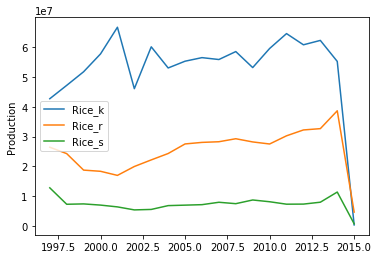

In [33]:
plt.plot(rice_values_k.Crop_Year,rice_values_k.Production,label='Rice_k')
plt.plot(rice_values_r.Crop_Year,rice_values_r.Production,label='Rice_r')
plt.plot(rice_values_s.Crop_Year,rice_values_s.Production,label='Rice_s')

plt.ylabel('Production')
plt.legend()

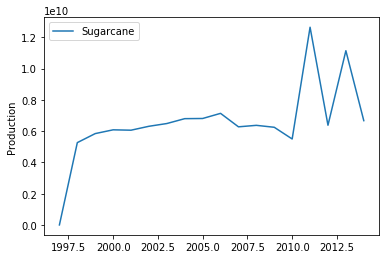

In [34]:
plt.plot(coconut_values.Crop_Year,coconut_values.Production,label='Sugarcane')
plt.ylabel('Production')
plt.legend()

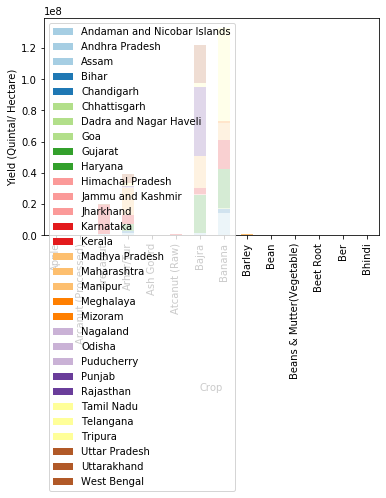

In [35]:
new_data=kharif_df.groupby(['Crop','State_Name']).Production.sum().reset_index().head(100)


# pivoting the dataframe
table = new_data.pivot('Crop','State_Name','Production')
# fill Nan values with zero
table = table.fillna(0)
# plot (stacked bar plots) pivoted dataframe
table.plot(kind='bar',stacked=True,colormap='Paired')
# setting Y label
plt.ylabel('Yield (Quintal/ Hectare)')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize']=(8,8)

In [36]:
#implementation of k-means clustering

def kmeans(X,K):
    m=X.shape[0] #number of rows.
    n=X.shape[1] #number of features. 
    n_iter=100 #no. of iterations

    #Initialize the centroids randomly from the data points:
    Centroids=np.array([]).reshape(n,0)
    for i in range(K):
        rand=np.random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]

    # output is a dictionary with cluster number as Keys and the data points as values.
    Output={}

    #Finding euclidian distance from each point to all the centroids and store in a matrix
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1

    #We need to regroup the data points based on the cluster index C and store in the Output dictionary 
    #and also compute the mean of separated clusters and assign it as new centroids. 
    #Y is a temporary dictionary which stores the solution for one particular iteration.
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
         Centroids[:,k]=np.mean(Y[k+1],axis=0)

    #Next we loop over n iterations
    for i in range(n_iter):
         
          EuclidianDistance=np.array([]).reshape(m,0)
          for k in range(K):
              tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
              EuclidianDistance=np.c_[EuclidianDistance,tempDist]
          C=np.argmin(EuclidianDistance,axis=1)+1
       
          Y={}
          for k in range(K):
              Y[k+1]=np.array([]).reshape(2,0)
          for i in range(m):
              Y[C[i]]=np.c_[Y[C[i]],X[i]]

          for k in range(K):
              Y[k+1]=Y[k+1].T

          for k in range(K):
              Centroids[:,k]=np.mean(Y[k+1],axis=0)
          Output=Y
        
    #normal scatter plot 
    plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
    plt.xlabel('Crop')
    plt.legend()
    plt.title('Plot of data points')
    plt.show()
    #scatter plot showing various clusters
    color=['red','blue','green','cyan','magenta','black','orange','yellow','olive']
    labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9']
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
    plt.xlabel('Crop')
    plt.legend()
    plt.rcParams['figure.figsize']=(8,8)
    plt.show()
    return Output
    

In [37]:
# A dictionary to encode crops in kharif_df
dict={}
j=1
for i in kharif_df['Crop'].unique():
    dict[i]=j
    j=j+1;
    

In [38]:
# Removing production whose value is 0
null_production=kharif_df.loc[kharif_df['Production']==0].index
kharif_df.drop(null_production,inplace=True)

In [39]:
kharif_df['crop_encode']=1
kharif_df.reset_index(inplace=True)

In [40]:
#A new feature crop_encode which contains the encoded values of crops
for i in range(0,kharif_df.shape[0]):
    kharif_df.loc[i,'crop_encode']=dict[kharif_df.loc[i,'Crop']]

In [41]:
kh=kharif_df.loc[kharif_df['State_Name']=='Karnataka'].copy()
kh['Area']=np.log(kh['Area'])
kh['Production']=np.log(kh['Production'])
kh['Productivity']=kh['Area']/kh['Production']

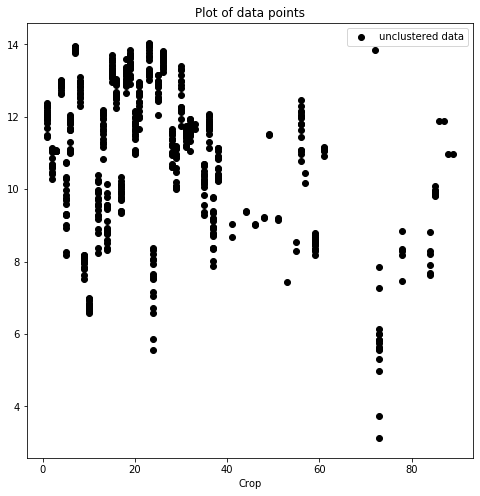

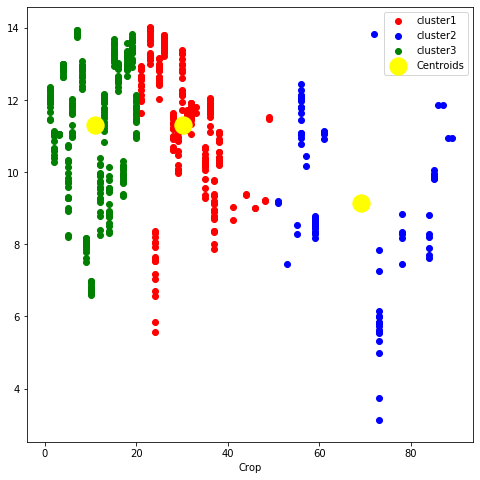

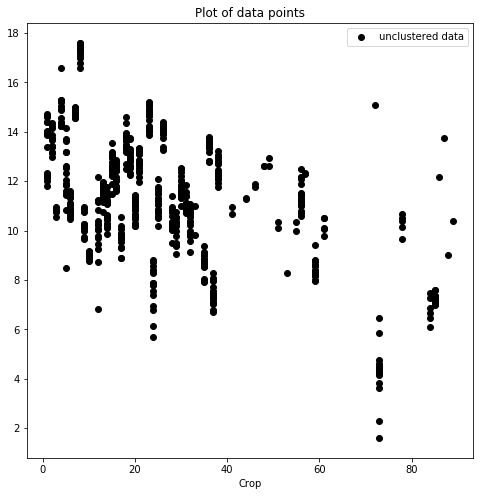

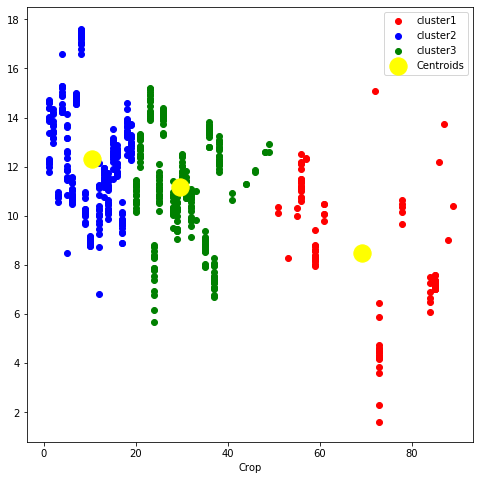

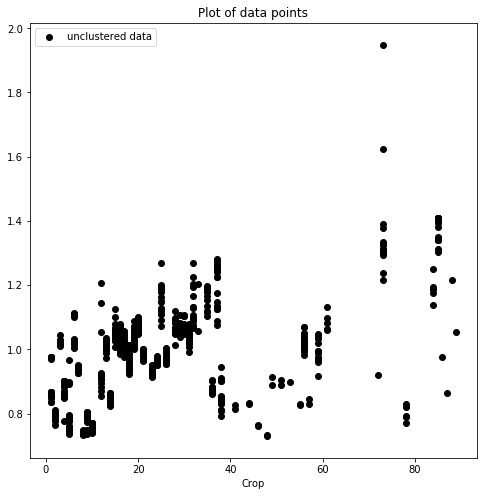

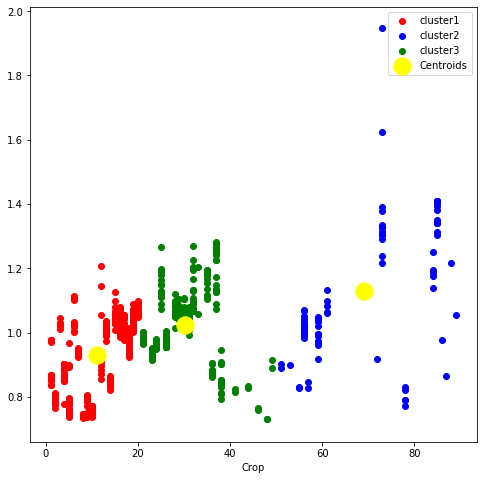

{1: array([[ 1.        ,  0.96955741],
        [15.        ,  1.12652905],
        [16.        ,  1.06991607],
        [12.        ,  1.20803362],
        [13.        ,  1.02473042],
        [ 5.        ,  0.9679978 ],
        [19.        ,  1.03628989],
        [20.        ,  1.07112492],
        [ 7.        ,  0.94413435],
        [ 8.        ,  0.73565702],
        [14.        ,  0.83011319],
        [ 1.        ,  0.85884193],
        [15.        ,  1.06206856],
        [16.        ,  1.03087666],
        [12.        ,  0.90722949],
        [17.        ,  1.01579661],
        [ 4.        ,  0.88476066],
        [18.        ,  0.96893999],
        [13.        ,  1.01266619],
        [ 5.        ,  0.76250025],
        [19.        ,  1.00626755],
        [20.        ,  1.06452268],
        [ 7.        ,  0.94049175],
        [14.        ,  0.83993607],
        [15.        ,  1.04472055],
        [16.        ,  1.04159562],
        [ 2.        ,  0.76588512],
        [12.        ,  0.

In [42]:
#applying kmeans to cluster based on area,production and productivity
X = kh.iloc[:, [7, 4]].values
kmeans(X,3)
Y= kh.iloc[:, [7, 5]].values
kmeans(Y,3)
Z = kh.iloc[:, [7, 8]].values
kmeans(Z,3)

In [43]:
def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [44]:
#applying db scan to cluster based on productivity
X = kh.iloc[:, [7, 8]].values
Y=MyDBSCAN(Z, 2.5,4 )


In [45]:
#no. of clusters in db scan
max(Y)
    

5

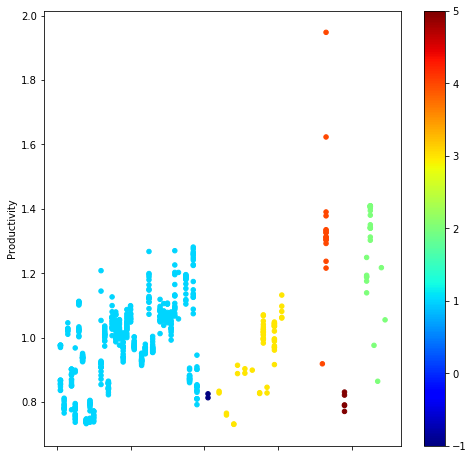

In [46]:
kh.plot.scatter('crop_encode', 'Productivity', c=Y, colormap='jet')

In [47]:
#analysis in Rabi Season

# A dictionary to encode crops in rabi_df
dict={}
j=1
for i in rabi_df['Crop'].unique():
    dict[i]=j
    j=j+1;
    
# Removing production whose value is 0
null_production=rabi_df.loc[rabi_df['Production']==0].index
rabi_df.drop(null_production,inplace=True)

rabi_df['crop_encode']=1
rabi_df.reset_index(inplace=True)

#A new feature crop_encode which contains the encoded values of crops
for i in range(0,rabi_df.shape[0]):
    rabi_df.loc[i,'crop_encode']=dict[rabi_df.loc[i,'Crop']]
kh=rabi_df.loc[rabi_df['State_Name']=='Karnataka'].copy()
kh['Area']=np.log(kh['Area'])
kh['Production']=np.log(kh['Production'])
kh['Productivity']=kh['Area']/kh['Production']

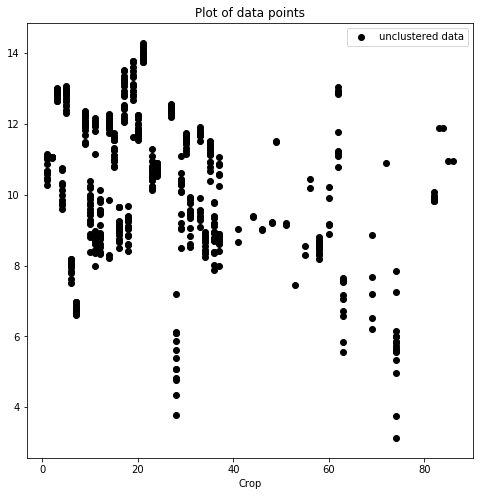

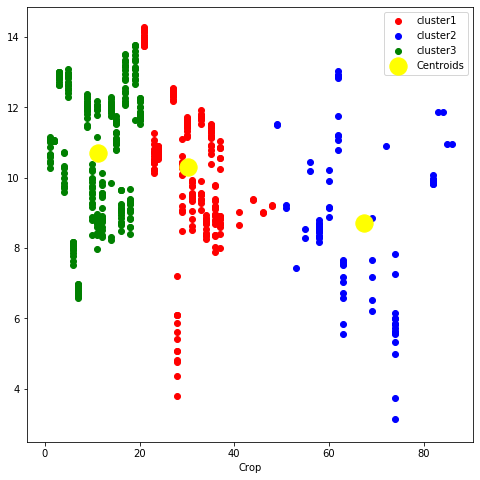

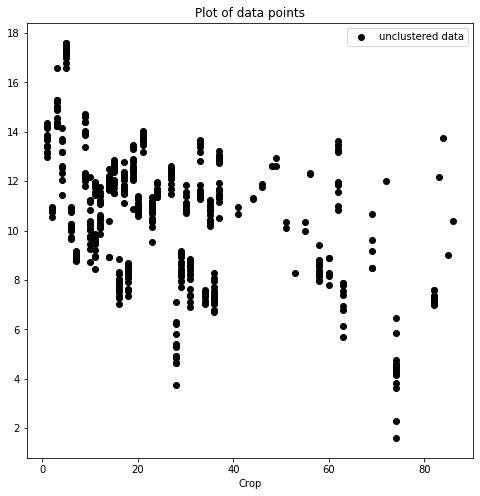

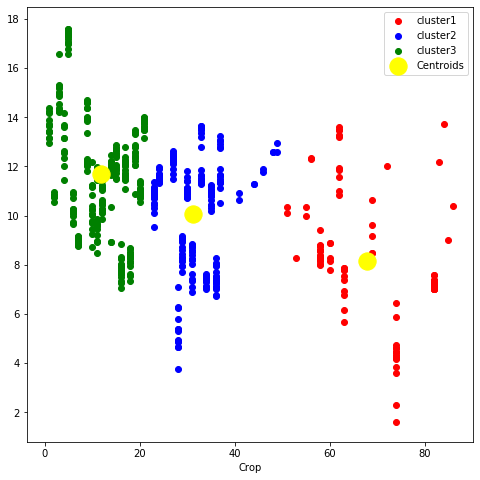

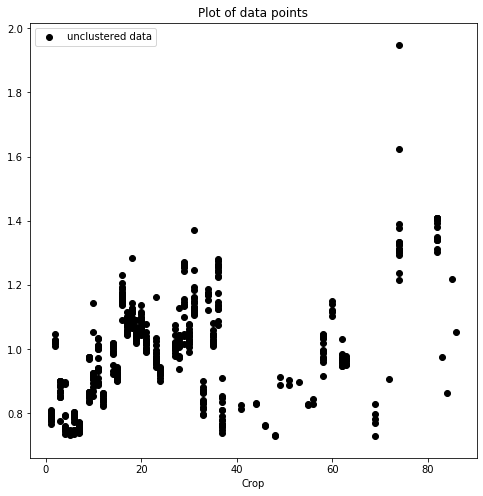

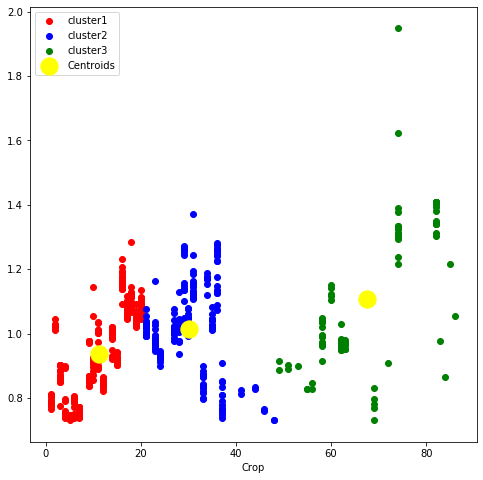

{1: array([[ 9.        ,  0.96955741],
        [11.        ,  0.93895564],
        [14.        ,  1.0050196 ],
        [20.        ,  1.06016383],
        [15.        ,  0.93863766],
        [ 5.        ,  0.73565702],
        [12.        ,  0.83011319],
        [ 9.        ,  0.85884193],
        [10.        ,  0.90722949],
        [ 3.        ,  0.88476066],
        [11.        ,  1.01266619],
        [19.        ,  1.04601667],
        [14.        ,  0.98472346],
        [20.        ,  1.07023659],
        [15.        ,  0.93836063],
        [16.        ,  1.09061911],
        [17.        ,  1.09969259],
        [12.        ,  0.83993607],
        [ 1.        ,  0.76588512],
        [10.        ,  0.90896883],
        [ 3.        ,  0.8840416 ],
        [11.        ,  1.00990513],
        [19.        ,  1.04965375],
        [14.        ,  0.99147286],
        [20.        ,  1.07441528],
        [15.        ,  0.92750177],
        [16.        ,  1.16857967],
        [ 5.        ,  0.

In [48]:
X = kh.iloc[:, [7, 4]].values
kmeans(X,3)
Y= kh.iloc[:, [7, 5]].values
kmeans(Y,3)
Z = kh.iloc[:, [7, 8]].values
kmeans(Z,3)

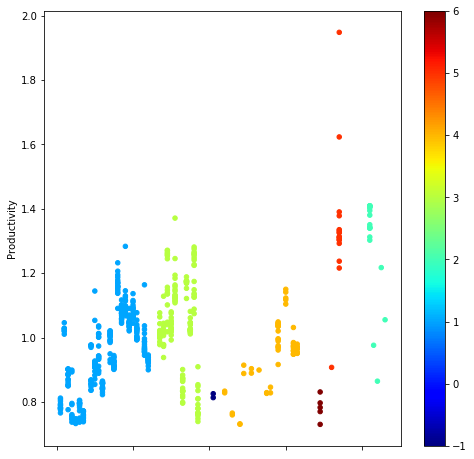

In [49]:
Y=MyDBSCAN(Z, 2.5,4 )
kh.plot.scatter('crop_encode', 'Productivity', c=Y, colormap='jet')

In [50]:
#analysis in summer Season

# A dictionary to encode crops in rabi_df
dict={}
j=1
for i in summer_df['Crop'].unique():
    dict[i]=j
    j=j+1;
    
# Removing production whose value is 0
null_production=summer_df.loc[summer_df['Production']==0].index
summer_df.drop(null_production,inplace=True)

summer_df['crop_encode']=1
summer_df.reset_index(inplace=True)

#A new feature crop_encode which contains the encoded values of crops
for i in range(0,summer_df.shape[0]):
    summer_df.loc[i,'crop_encode']=dict[summer_df.loc[i,'Crop']]
kh=summer_df.loc[summer_df['State_Name']=='Karnataka'].copy()
kh['Area']=np.log(kh['Area'])
kh['Production']=np.log(kh['Production'])
kh['Productivity']=kh['Area']/kh['Production']

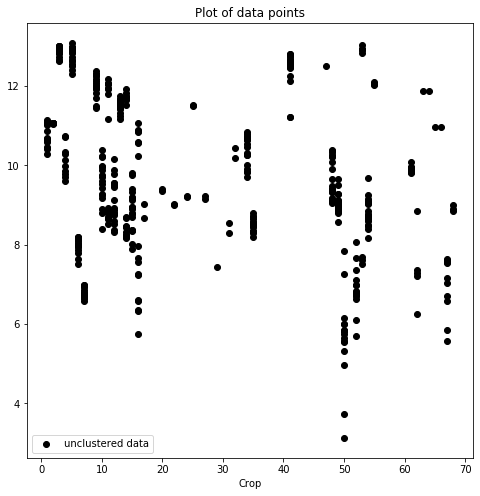

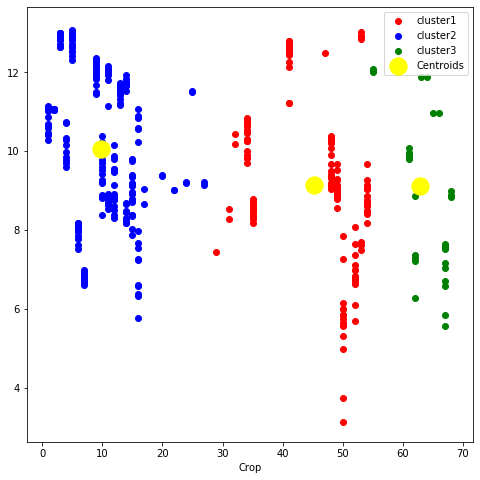

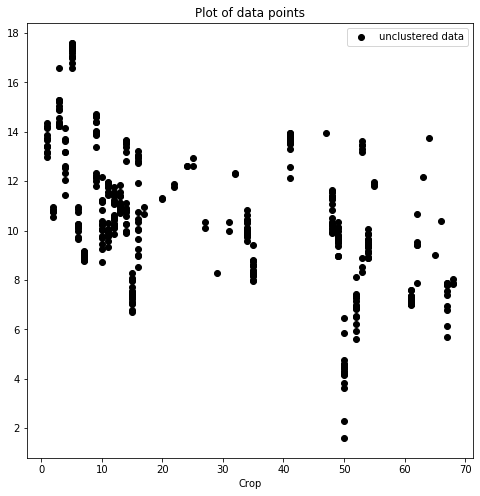

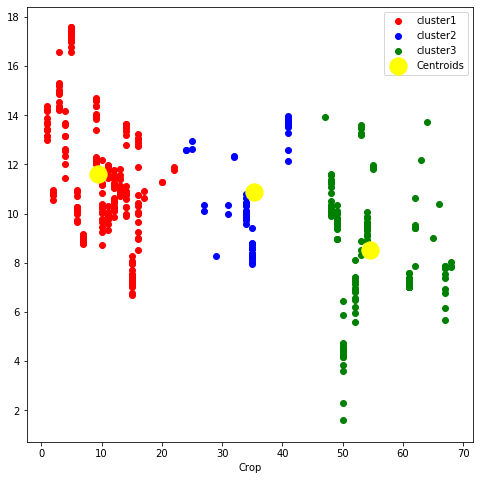

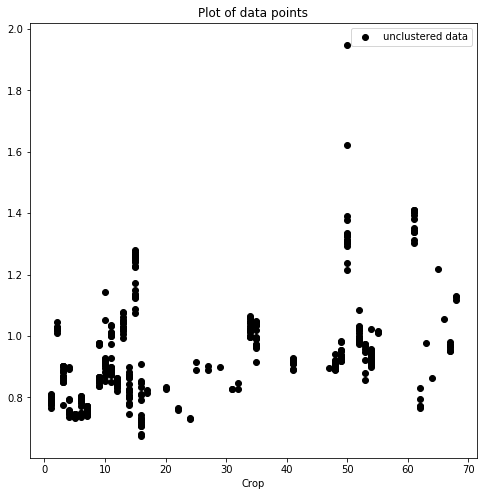

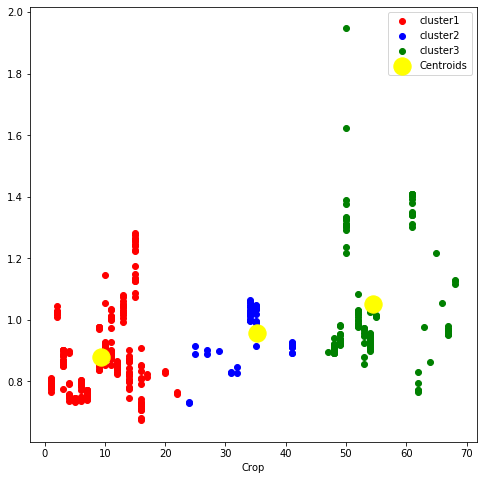

{1: array([[ 9.        ,  0.96955741],
        [15.        ,  1.22665774],
        [ 5.        ,  0.73565702],
        [12.        ,  0.83011319],
        [ 9.        ,  0.85884193],
        [10.        ,  0.90722949],
        [ 3.        ,  0.88476066],
        [15.        ,  1.22426019],
        [11.        ,  1.01266619],
        [14.        ,  0.77607957],
        [16.        ,  0.72073737],
        [12.        ,  0.83993607],
        [ 1.        ,  0.76588512],
        [10.        ,  0.90896883],
        [ 3.        ,  0.8840416 ],
        [15.        ,  1.24766814],
        [11.        ,  1.00990513],
        [14.        ,  0.86373717],
        [16.        ,  0.79188566],
        [ 5.        ,  0.73549121],
        [ 6.        ,  0.79628925],
        [ 7.        ,  0.76768178],
        [13.        ,  1.04919058],
        [12.        ,  0.85687967],
        [ 9.        ,  0.97397854],
        [ 1.        ,  0.78247021],
        [10.        ,  0.90933479],
        [ 3.        ,  0.

In [51]:
X = kh.iloc[:, [7, 4]].values
kmeans(X,3)
Y= kh.iloc[:, [7, 5]].values
kmeans(Y,3)
Z = kh.iloc[:, [7, 8]].values
kmeans(Z,3)

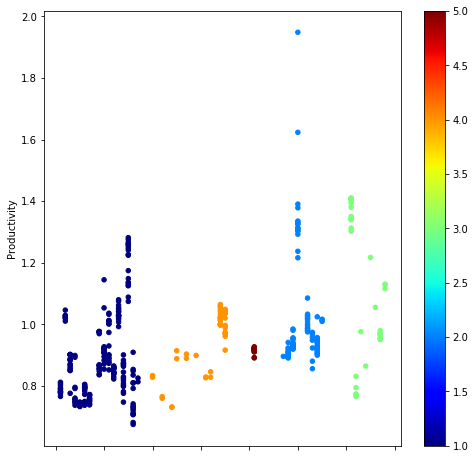

In [52]:
Y=MyDBSCAN(Z, 2.5,4 )
kh.plot.scatter('crop_encode', 'Productivity', c=Y, colormap='jet')

In [63]:
#Clustering states based on productivity in Kharif season

group1=kharif_df.groupby(['State_Name']).Production.sum()
group2=kharif_df.groupby(['State_Name']).Area.sum()
group=pd.concat([group1,group2],axis=1)
group.reset_index(inplace=True)
group['Productivity']=group['Production']/group['Area']

#Encoding States
dict={}
j=1
for i in group['State_Name'].unique():
    dict[i]=j
    j=j+1;
group['state_encode']=1
for i in range(0,group.shape[0]):
    group.loc[i,'state_encode']=dict[group.loc[i,'State_Name']]
group['Productivity']=np.log(group['Productivity'])

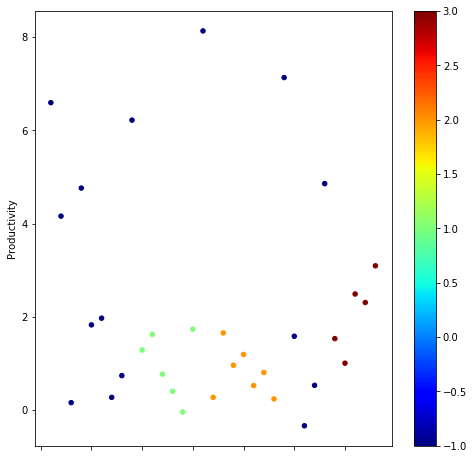

In [66]:
X = group.iloc[:, [4, 3]].values
Y=MyDBSCAN(X, 2.5,5 )
group.plot.scatter('state_encode', 'Productivity', c=Y, colormap='jet')

In [67]:
Y

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 3,
 3,
 3,
 3]

In [68]:
#Clustering states based on productivity in Rabi season

group1=rabi_df.groupby(['State_Name']).Production.sum()
group2=rabi_df.groupby(['State_Name']).Area.sum()
group=pd.concat([group1,group2],axis=1)
group.reset_index(inplace=True)
group['Productivity']=group['Production']/group['Area']

#Encoding States
dict={}
j=1
for i in group['State_Name'].unique():
    dict[i]=j
    j=j+1;
group['state_encode']=1
for i in range(0,group.shape[0]):
    group.loc[i,'state_encode']=dict[group.loc[i,'State_Name']]
group['Productivity']=np.log(group['Productivity'])

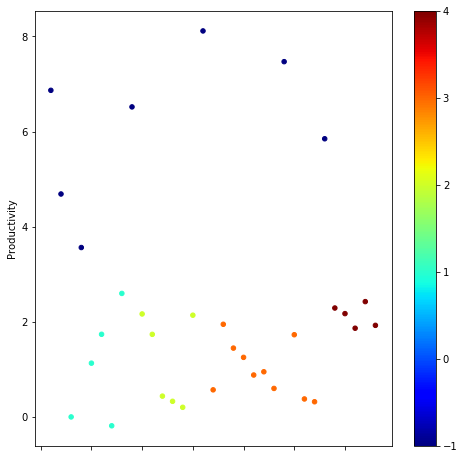

In [69]:
X = group.iloc[:, [4, 3]].values
Y=MyDBSCAN(X, 2.5,4 )
group.plot.scatter('state_encode', 'Productivity', c=Y, colormap='jet')

In [70]:
#Clustering states based on productivity in summer season

group1=summer_df.groupby(['State_Name']).Production.sum()
group2=summer_df.groupby(['State_Name']).Area.sum()
group=pd.concat([group1,group2],axis=1)
group.reset_index(inplace=True)
group['Productivity']=group['Production']/group['Area']

#Encoding States
dict={}
j=1
for i in group['State_Name'].unique():
    dict[i]=j
    j=j+1;
group['state_encode']=1
for i in range(0,group.shape[0]):
    group.loc[i,'state_encode']=dict[group.loc[i,'State_Name']]
group['Productivity']=np.log(group['Productivity'])

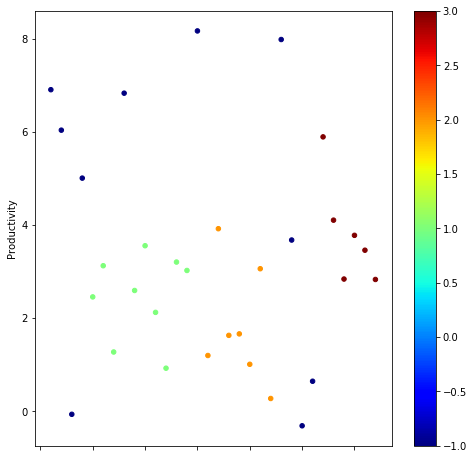

In [71]:
X = group.iloc[:, [4, 3]].values
Y=MyDBSCAN(X, 2.5,4 )
group.plot.scatter('state_encode', 'Productivity', c=Y, colormap='jet')